In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('/content/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.shape

(30, 2)

In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
# splitting the data
x = df[['YearsExperience']]
y = df['Salary']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(24, 1)
(6, 1)
(24,)
(6,)


<Axes: >

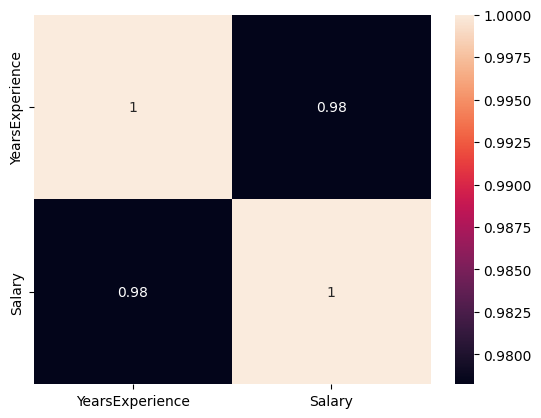

In [6]:
import numpy as np
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [7]:
# training the model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)


LinearRegression()

In [8]:
print(LR.intercept_)


26221.371993214758


In [9]:
print(LR.coef_)

[9495.59632015]


In [10]:
LR.score(X_train,Y_train)

0.9569738453489168

In [11]:
ypred = LR.predict(X_test)
print(ypred)
# evaluating the performance of the model
import numpy as np # for rmse calculation
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(Y_test,ypred)
rmse = np.sqrt(mean_squared_error(Y_test,ypred))
print('r-squared: ',r2)
print('rmse: ',rmse)

[ 56607.28021771  90791.42697027  72749.79396197  74648.913226
 108833.05997856 111681.73887461]
r-squared:  0.9462120810420039
rmse:  4840.662282589321


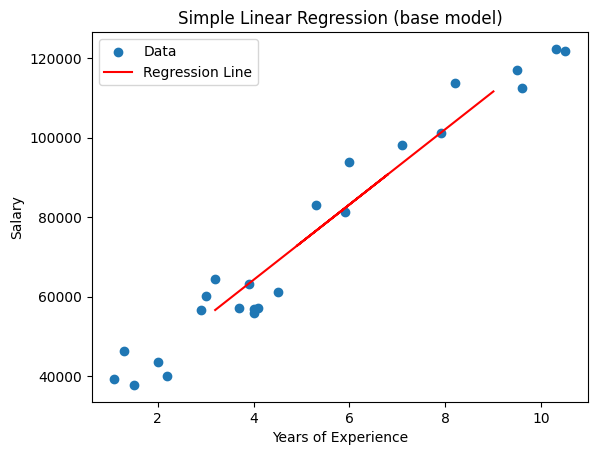

In [17]:
# visualizing the base model predictions
import matplotlib.pyplot as plt
plt.scatter(X_train,Y_train, label='Data')
plt.plot(X_test, ypred, color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Simple Linear Regression (base model)')
plt.show()

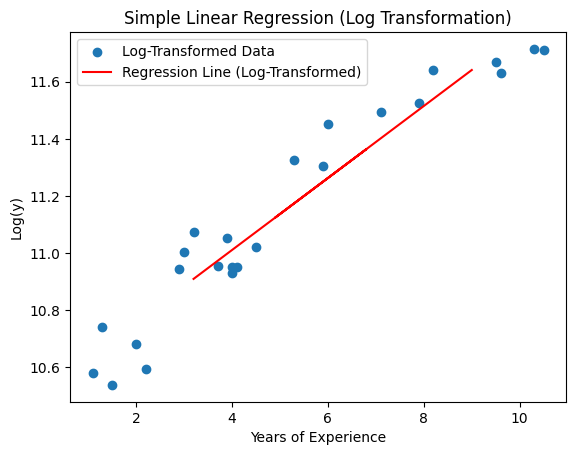

In [18]:
# Transformation models
y_log = np.log(Y_train)
LR_log = LinearRegression()
LR_log.fit(X_train, y_log)
y_log_pred = LR_log.predict(X_test)
plt.scatter(X_train, y_log, label='Log-Transformed Data')
plt.plot(X_test, y_log_pred, color='red', label='Regression Line (Log-Transformed)')
plt.xlabel('Years of Experience')
plt.ylabel('Log(y)')
plt.legend()
plt.title('Simple Linear Regression (Log Transformation)')
plt.show()

In [19]:
# evaluating the performance of the model
from sklearn.metrics import r2_score, mean_squared_error,mean_squared_log_error
r2 = r2_score(Y_test,y_log_pred)
rmse = np.sqrt(mean_squared_error(Y_test,y_log_pred))
msle = mean_squared_log_error(Y_test,y_log_pred)
print('r-squared: ',r2)
print('rmse: ',rmse)
print('mean squared log error: ', msle)

r-squared:  -15.629656236129211
rmse:  85114.59741083276
mean squared log error:  77.11830548494632


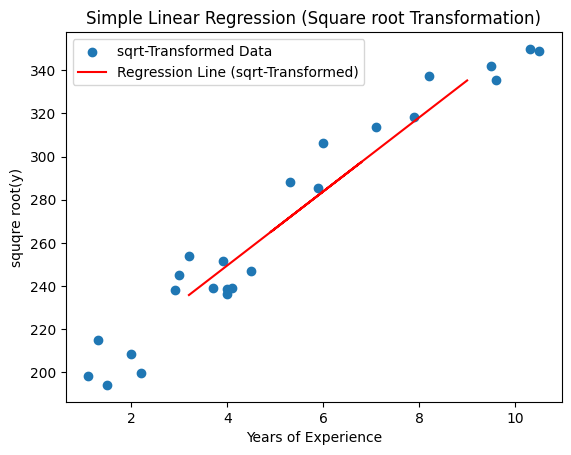

In [20]:
# Square root transformation
y_sqrt = np.sqrt(Y_train)
LR_sqrt = LinearRegression()
LR_sqrt.fit(X_train, y_sqrt)
y_sqrt_pred = LR_sqrt.predict(X_test)
plt.scatter(X_train, y_sqrt, label='sqrt-Transformed Data')
plt.plot(X_test, y_sqrt_pred, color='red', label='Regression Line (sqrt-Transformed)')
plt.xlabel('Years of Experience')
plt.ylabel('squqre root(y)')
plt.legend()
plt.title('Simple Linear Regression (Square root Transformation)')
plt.show()

In [21]:
#evaluating the performance of the model
from sklearn.metrics import r2_score, mean_squared_error,mean_squared_log_error
r2 = r2_score(Y_test,y_sqrt_pred)
rmse = np.sqrt(mean_squared_error(Y_test,y_sqrt_pred))
msle = mean_squared_log_error(Y_test,y_sqrt_pred)
print('r-squared: ',r2)
print('rmse: ',rmse)
print('mean squared log error: ', msle)

r-squared:  -15.521380557455455
rmse:  84837.05436402105
mean squared log error:  31.677689540944172


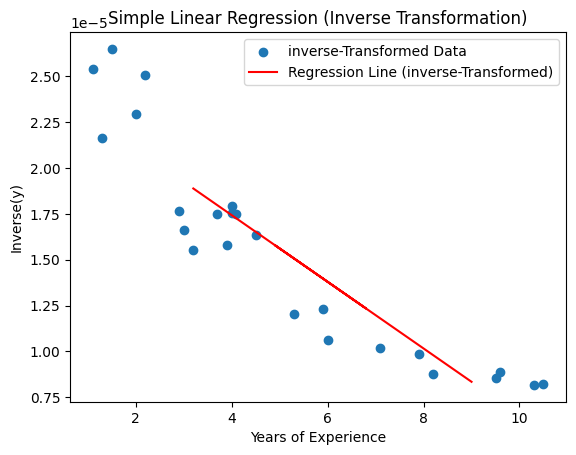

In [22]:
# Inverse transformation
y_inverse = 1/Y_train
LR_inverse = LinearRegression()
LR_inverse.fit(X_train, y_inverse)
y_inverse_pred = LR_inverse.predict(X_test)
plt.scatter(X_train, y_inverse, label='inverse-Transformed Data')
plt.plot(X_test, y_inverse_pred, color='red', label='Regression Line (inverse-Transformed)')
plt.xlabel('Years of Experience')
plt.ylabel('Inverse(y)')
plt.legend()
plt.title('Simple Linear Regression (Inverse Transformation)')
plt.show()

In [23]:
# evaluating the performance of the model
from sklearn.metrics import r2_score, mean_squared_error,mean_squared_log_error
r2 = r2_score(Y_test,y_inverse_pred)
rmse = np.sqrt(mean_squared_error(Y_test,y_inverse_pred))
msle = mean_squared_log_error(Y_test,y_inverse_pred)
print('r-squared: ',r2)
print('rmse: ',rmse)
print('mean squared log error: ', msle)

r-squared:  -15.633961682548325
rmse:  85125.61485513409
mean squared log error:  127.47948572465037


Hence the best model for the given dataset would be the base linear regression model with r2_score value of 0.94